In [1]:
import sys
sys.path.append('../')

import jax 
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

from sphere.model.implementations.solvers.euler import EulerSolver

def SIR_RHS(x_t,t):
    S,I,R = x_t
    N = S + I + R
    dS = -0.3 * S * I/N
    dI = 0.3 * S * I/N - 0.1 * I
    dR = 0.1 * I
    return jnp.array([dS,dI,dR])

args = {"func":SIR_RHS}

solver = EulerSolver(args = args, delta_t = 0.1)

num_steps = 100 * int(1/solver.delta_t)

x_t = jnp.ones((3,num_steps))

x_t = x_t.at[:,0].set(jnp.array([500,5,0]))

def run(num_steps,x_t):
    for t in range(1,num_steps):
        x_t = x_t.at[:,t].set(solver.solve(x_t[:,t-1],t))

    return x_t

x_t = run(num_steps,x_t)

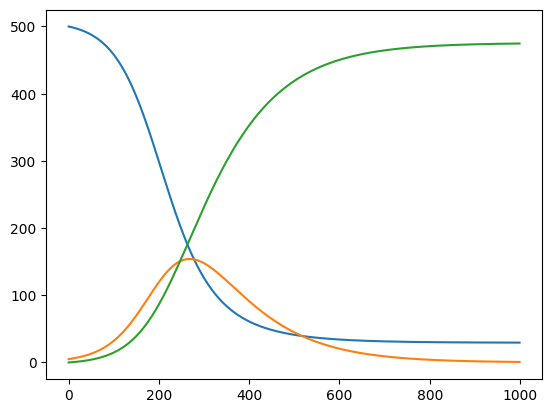

In [2]:
for compartment in range(3):
    plt.plot(x_t[compartment,:])

In [3]:
from sphere.model.implementations.solvers.tau_leap import TauLeapSolver
from jax.random import PRNGKey

def events(x_t,t):
    S,I,R = x_t
    N = S + I + R

    return jnp.array([(0.3 * S * I)/N , 0.1 * I])

args = {'rates':events, 'transitions': lambda : [(0,0,'-'),(1,0,'+'),(1,1,'-'),(2,1,'+')]}

num_steps = 100 * int(1/0.1)



key = PRNGKey(5)
solver = TauLeapSolver(tau = 0.1,prng_key = key, args = args)

x_t = jnp.ones((3,num_steps))

x_t = x_t.at[:,0].set(jnp.array([500,5,0]))


def run(num_steps,x_t,key):
    for t in range(1,num_steps):
        key,subkey = jax.random.split(key)
        solver.prng_key = subkey
        x_t = x_t.at[:,t].set(solver.solve(x_t[:,t-1],t))

    return x_t 

x_t = run(num_steps,x_t,key)



(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)


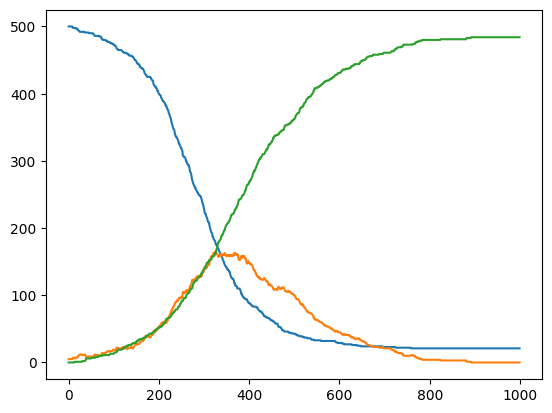

In [4]:
for compartment in range(3):
    plt.plot(x_t[compartment,:])

In [5]:
N = 5

key = jax.random.PRNGKey(seed = 5)

for i in range(N):
  key, subkey = jax.random.split(key)
  values = jax.random.uniform(subkey)
  print(values)
  # key carries over to the next iteration


0.85639954
0.782977
0.6885854
0.31805182
0.5426626


In [6]:
N = 5

key = jax.random.PRNGKey(seed = 5)

key, subkey = jax.random.split(key)
values = jax.random.uniform(subkey,shape = (5,))
print(values)


[0.9742112  0.9115776  0.9564198  0.61197233 0.01329291]


In [7]:
def f(key):
  return jax.random.uniform(key, shape = (5,))

jax.vmap(f)(jax.random.split(key, N))

Array([[0.48656118, 0.1985507 , 0.9577817 , 0.05806339, 0.10801613],
       [0.34794176, 0.32056522, 0.45650268, 0.3425752 , 0.5818558 ],
       [0.93606544, 0.18092668, 0.32132137, 0.46603143, 0.06276429],
       [0.23921657, 0.2583629 , 0.9964601 , 0.48328102, 0.7131008 ],
       [0.8333286 , 0.28547597, 0.4407779 , 0.60889196, 0.09917378]],      dtype=float32)

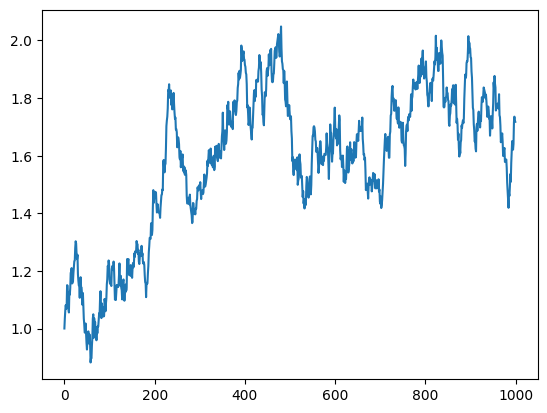

In [8]:
from sphere.model.implementations.solvers.euler_maruyama import EulerMaruyamaSolver
from jax.random import PRNGKey


args = {"drift": lambda x_t, t: 0.05 * (1.5 - x_t),"diffusion": lambda x_t,t: 0.1}

key = PRNGKey(seed = 5)
solver = EulerMaruyamaSolver(delta_t = 0.1,prng_key = key, args = args)

x_t = jnp.ones(num_steps)

x_t = x_t.at[0].set(1)

for t in range(1,num_steps):
    key,subkey = jax.random.split(key)
    solver.prng_key = subkey
    x_t = x_t.at[t].set(solver.solve(x_t[t-1],t))

colors = ['green','red','blue']
plt.plot(x_t)

plt.show()

In [9]:
from sphere.model.implementations.solvers.euler_maruyama import EulerMaruyamaSolver
from jax.random import PRNGKey

def SIR_RHS(x_t,t):
    S,I,R = x_t
    N = S + I + R
    dS = -0.3 * S * I/N
    dI = 0.3 * S * I/N - 0.1 * I
    dR = 0.1 * I
    return jnp.array([dS,dI,dR])

args = {"drift": SIR_RHS,"diffusion": lambda x_t,t: 0.05 * x_t}

num_steps = 100 * int(1/0.1)

key = PRNGKey(seed = 5)
solver = EulerMaruyamaSolver(delta_t = 0.1, prng_key = key, args = args)


x_t = jnp.ones((3,num_steps))

x_t = x_t.at[:,0].set(jnp.array([500,5,0]))

def run(num_steps,x_t,key):
    for t in range(1,num_steps):
        key,subkey = jax.random.split(key)
        solver.prng_key = subkey
        x_t = x_t.at[:,t].set(solver.solve(x_t[:,t-1],t))

    return x_t

x_t = run(num_steps,x_t,key)


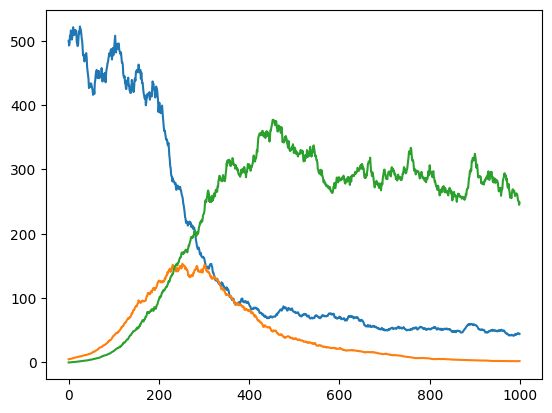

In [10]:
for compartment in range(3):
    plt.plot(x_t[compartment,:])